In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [17]:
#load data
oecd_bli = pd.read_csv("T:\Research\ML_Competition-AND-Practice\Practice\Hands on ML with Scikit Learn and TF\datasets\oecd_bli_2015.csv", thousands = ',')
gdp_per_capita =pd.read_csv("T:\Research\ML_Competition-AND-Practice\Practice\Hands on ML with Scikit Learn and TF\datasets\gdp_per_capita.csv", thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")

In [18]:
#don't worry if you don't get it now. w'll learn it later.

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(
        index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
 
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [19]:
#prepare data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

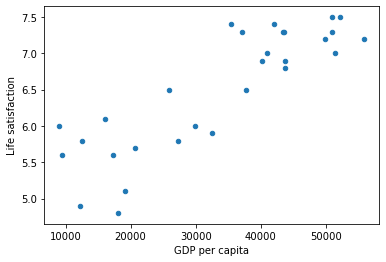

In [21]:
# Visualize data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [22]:
# linear model
model = sklearn.linear_model.LinearRegression()

In [23]:
# Train
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#prediction for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new))

[[5.96242338]]


Now, try with KNN Regression

In [25]:
#KNN
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [26]:
# Train
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
#prediction for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new))

[[5.76666667]]
